### Libraries 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

%matplotlib inline

### Data Loading

In [4]:
data1 = pd.read_csv(r"C:\Users\CR GAYATHRI\Desktop\Python_Internship\Fraud_Detect\Customer_DF (1).csv")

In [5]:
data1.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [6]:
data1.drop(['Unnamed: 0'], axis =1, inplace = True)

In [7]:
data1.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [8]:
data1.shape

(168, 9)

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 9 columns):
customerEmail             168 non-null object
customerPhone             168 non-null object
customerDevice            168 non-null object
customerIPAddress         168 non-null object
customerBillingAddress    168 non-null object
No_Transactions           168 non-null int64
No_Orders                 168 non-null int64
No_Payments               168 non-null int64
Fraud                     168 non-null bool
dtypes: bool(1), int64(3), object(5)
memory usage: 10.8+ KB


In [10]:
data1.columns

Index(['customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress', 'No_Transactions', 'No_Orders', 'No_Payments',
       'Fraud'],
      dtype='object')

In [11]:
# Correlation

data1.corr()

,No_Transactions,No_Orders,No_Payments,Fraud
No_Transactions,1.000000,0.888020,0.225298,0.136451
No_Orders,0.888020,1.000000,0.323013,0.234528
No_Payments,0.225298,0.323013,1.000000,0.357312
Fraud,0.136451,0.234528,0.357312,1.000000


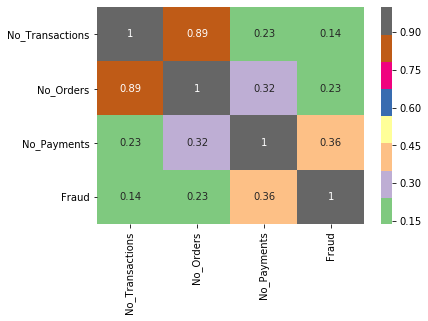

In [12]:
ax = sns.heatmap(data1.corr(), annot = True, cmap = 'Accent')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show();

In [13]:
data1.describe()

,No_Transactions,No_Orders,No_Payments
count,168.000000,168.000000,168.000000
mean,3.708333,2.845238,2.035714
std,2.801527,1.981919,2.113240
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,4.000000,3.000000,1.000000
75%,5.000000,4.000000,2.000000
max,15.000000,8.000000,15.000000


In [14]:
data2 = pd.read_csv(r"C:\Users\CR GAYATHRI\Desktop\Python_Internship\Fraud_Detect\cust_transaction_details (1).csv")

In [15]:
data2.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [16]:
data2.drop(['Unnamed: 0'], axis =1, inplace = True)

In [17]:
data2.head()

,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [18]:
data2.shape

(623, 10)

In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
customerEmail                       623 non-null object
transactionId                       623 non-null object
orderId                             623 non-null object
paymentMethodId                     623 non-null object
paymentMethodRegistrationFailure    623 non-null int64
paymentMethodType                   623 non-null object
paymentMethodProvider               623 non-null object
transactionAmount                   623 non-null int64
transactionFailed                   623 non-null int64
orderState                          623 non-null object
dtypes: int64(3), object(7)
memory usage: 48.8+ KB


In [20]:
data2.columns

Index(['customerEmail', 'transactionId', 'orderId', 'paymentMethodId',
       'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'transactionAmount', 'transactionFailed',
       'orderState'],
      dtype='object')

In [21]:
data2.corr()

,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
paymentMethodRegistrationFailure,1.000000,0.041753,-0.001202
transactionAmount,0.041753,1.000000,0.002385
transactionFailed,-0.001202,0.002385,1.000000


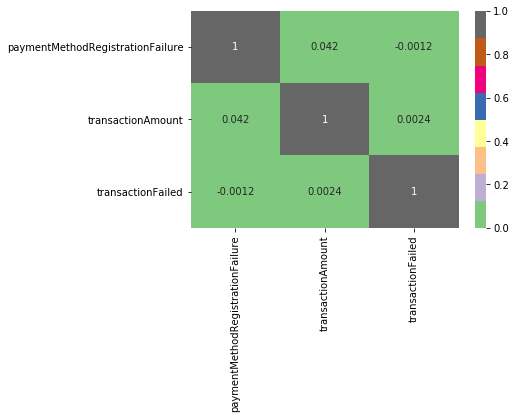

In [22]:
ax = sns.heatmap(data2.corr(), annot = True, cmap = 'Accent')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show();

In [23]:
data2.describe()

,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,623.000000,623.000000,623.000000
mean,0.131621,34.598716,0.269663
std,0.338350,20.360247,0.444141
min,0.000000,10.000000,0.000000
25%,0.000000,21.000000,0.000000
50%,0.000000,34.000000,0.000000
75%,0.000000,45.000000,1.000000
max,1.000000,353.000000,1.000000


### Checking for Null values

In [24]:
data1.isnull().sum()

customerEmail             0
customerPhone             0
customerDevice            0
customerIPAddress         0
customerBillingAddress    0
No_Transactions           0
No_Orders                 0
No_Payments               0
Fraud                     0
dtype: int64

In [25]:
data2.isnull().sum()

customerEmail                       0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
dtype: int64

### EDA

In [26]:
data1.select_dtypes(include = 'object').columns

Index(['customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress'],
      dtype='object')

In [27]:
data2.select_dtypes(include = 'object').columns

Index(['customerEmail', 'transactionId', 'orderId', 'paymentMethodId',
       'paymentMethodType', 'paymentMethodProvider', 'orderState'],
      dtype='object')

In [28]:
data1['customerEmail'].nunique()

# shape of data1 is 168 but here unique rows are 161 so there might be repeated rows

161

In [29]:
data2['customerEmail'].nunique()

136

In [30]:
# Will find repeated rows

mail_list=[]
repeat =0
result={}
for i in range(0,168):
    repeat = 0
    for j in range(0,168):
        if data1['customerEmail'][i] == data1['customerEmail'][j]:
            repeat+=1
    result.update({data1['customerEmail'][i]:repeat})
result 

{'josephhoward@yahoo.com': 1,
 'evansjeffery@yahoo.com': 1,
 'andersonwilliam@yahoo.com': 1,
 'rubenjuarez@yahoo.com': 1,
 'uchen@malone.com': 1,
 'robinsoncynthia@dunn.com': 1,
 'samuel15@saunders-rhodes.com': 1,
 'johnlowery@gmail.com': 8,
 'jameslandry@rodriguez.com': 1,
 'ubranch@rivera-parker.info': 1,
 'bowenwilliam@yahoo.com': 1,
 'ksummers@hotmail.com': 1,
 'christineklein@wright-boyd.org': 1,
 'meganwalters@chavez.com': 1,
 'caleb94@sutton.info': 1,
 'gonzalesjackson@gmail.com': 1,
 'dana09@yahoo.com': 1,
 'alec27@bell.com': 1,
 'juliecook@hotmail.com': 1,
 'meganberry@clark.biz': 1,
 'psantiago@nelson.net': 1,
 'harrisnicholas@mitchell-hancock.com': 1,
 'davismike@hotmail.com': 1,
 'guerramichael@hotmail.com': 1,
 'natalie98@yahoo.com': 1,
 'karen54@mullins.biz': 1,
 'avaldez@gmail.com': 1,
 'blackjoel@wright.com': 1,
 'abigail08@yahoo.com': 1,
 'catherine64@gmail.com': 1,
 'romerolauren@hotmail.com': 1,
 'qramsey@hotmail.com': 1,
 '9es7t@u6n7x': 1,
 'ypruitt@hotmail.com': 1,

In [31]:
data1[data1['customerEmail'] == 'johnlowery@gmail.com']

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",6,5,2,True
40,johnlowery@gmail.com,737-377-9701x577,jz66ap43id2y35ivfqa5,6c21:ac1d:2089:68fa:abb7:8c00:525f:6588,"08238 Kyle Squares Suite 893\nMillermouth, IN ...",0,0,1,True
45,johnlowery@gmail.com,+16(4)9016414340,cdx178qymd6vy77nm4x3,222.79.159.140,"77711 Pamela Ridge\nNew Kayla, IL 27182",3,2,1,True
65,johnlowery@gmail.com,04712252182,311kdz4c1210iixltk2j,42b3:df19:86fe:abd9:dafe:f6c1:eb76:c72,"11704 Andrew Villages Apt. 035\nJamesfurt, OR ...",7,5,1,True
79,johnlowery@gmail.com,1-820-539-4726x993,2in0fh7lep289n8dcbdz,163.128.139.42,"814 Wagner Union\nAshleymouth, HI 35617",2,2,1,True
133,johnlowery@gmail.com,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",0,0,0,True
155,johnlowery@gmail.com,076-099-0630x72770,6qy6oa3nqutsyyxzc54c,f259:657f:f329:2fca:c06c:8b57:d6ac:2380,"687 Rogers Bridge Suite 780\nValdezburgh, IN 2...",6,5,3,True
165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True


In [32]:
data2['paymentMethodType'].unique()

array(['card', 'bitcoin', 'apple pay', 'paypal'], dtype=object)

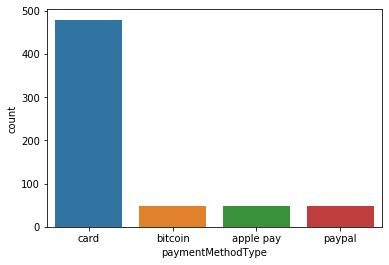

In [33]:
sns.countplot(data2['paymentMethodType'],data = data2);

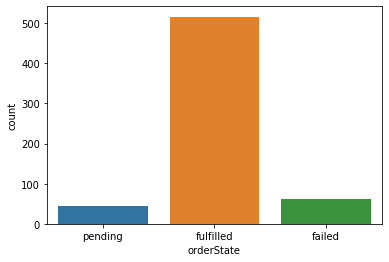

In [34]:
sns.countplot(data2['orderState']);

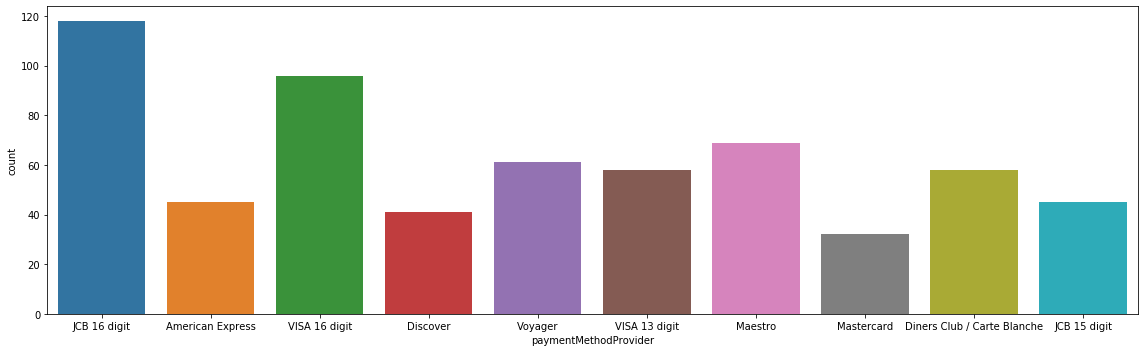

In [35]:
plt.figure(figsize=(16,5))
sns.countplot(data2['paymentMethodProvider'])
plt.tight_layout()
plt.show();

# More payments are made by JCB VISA and Maestro

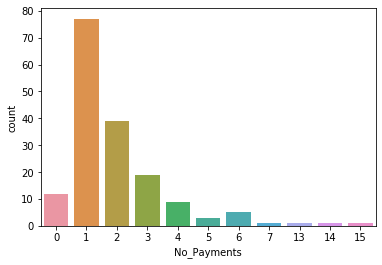

In [36]:
sns.countplot(data1['No_Payments']);

In [37]:
#  finding out the emails that are not common in the 2 datasets.
l = []
for i in range(0,168):
    uncommon=0
    for j in range(0,623):
        if data1['customerEmail'][i]==data2['customerEmail'][j]:
            uncommon+=1
    if uncommon==0:
        l.append(data1['customerEmail'][i])
print(len(l))
l

25


['ubranch@rivera-parker.info',
 'guerramichael@hotmail.com',
 'zbennett@frazier.com',
 'xwang@white.com',
 'smithtiffany@davis-perkins.com',
 'knichols@gmail.com',
 'gsimpson@cox.org',
 'johnsonjennifer@yahoo.com',
 'whodges@yahoo.com',
 'zthomas@gmail.com',
 'dana23@lawrence.net',
 'brockmatthew@hotmail.com',
 'kevinreyes@johnston.net',
 'michael57@oconnor.com',
 'grace99@wright.com',
 'ukline@spears.biz',
 '3fooiar@6eph',
 'shawseth@stout-novak.com',
 'kellyfrank@atkinson.com',
 'wbeltran@ramirez-shaffer.com',
 'xramos@hardy.net',
 'stephanie21@reyes-spencer.biz',
 'bhorne@fuller-nelson.com',
 'davidwalker@hotmail.com',
 'philipnelson@dean.com']

In [38]:
common =0
for i in data1['customerEmail']:
    for email in data2['customerEmail']:
        if i==email:
            common+=1
            break
common

143

In [39]:
final = data1[data1['customerEmail'].isin(data2['customerEmail'])== True]
final.shape

(143, 9)

In [40]:
final.reset_index(inplace = True)

In [41]:
#Now adding Total Transaction amount column.

Total_transaction_amt = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==data2['customerEmail'][j]):
            s += data2['transactionAmount'][j]
    Total_transaction_amt.append(s)  

In [42]:
final['Total_transaction_amt'] = Total_transaction_amt

In [43]:
# Now adding No. of Transactions Failed Columns.

No_transactionsFail = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==data2['customerEmail'][j]):
            s += data2['transactionFailed'][j]
    No_transactionsFail.append(s)        
final['No_transactionsFail'] = No_transactionsFail

In [44]:
# Now adding Payment Method Registration Failures column.

PaymentRegFail = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==data2['customerEmail'][j]):
            s += data2['paymentMethodRegistrationFailure'][j]
    PaymentRegFail.append(s)  
final['PaymentRegFail'] = PaymentRegFail

In [45]:
# Now adding No. of payments from Paypal, Apple Pay, Card, Bitcoin columns.

def col_make(column_name,category):
    array = []
    for i in range(0,143):
        s=0
        for j in range(0,623):
            if(final['customerEmail'][i]==data2['customerEmail'][j]):
                if data2[column_name][j]==category:
                    s+=1
        array.append(s)
    return array 

In [46]:
PaypalPayments = col_make('paymentMethodType','paypal')
ApplePayments = col_make('paymentMethodType','apple pay')
BitcoinPayments = col_make('paymentMethodType','bitcoin')
CardPayments = col_make('paymentMethodType','card')

In [47]:
final['PaypalPayments']= PaypalPayments
final['ApplePayments']= ApplePayments
final['CardPayments']= CardPayments
final['BitcoinPayments']= BitcoinPayments

In [48]:
# Now adding Order Fullfilled, Pending, Failed columns.

OrdersFulfilled = col_make('orderState','fulfilled')
OrdersFailed =  col_make('orderState','failed')
OrdersPending = col_make('orderState','pending')
final['OrdersFulfilled'] = OrdersFulfilled
final['OrdersPending'] = OrdersPending
final['OrdersFailed'] = OrdersFailed

In [49]:
JCB_16 = col_make('paymentMethodProvider','JCB 16 digit')
AmericanExp = col_make('paymentMethodProvider','American Express')
VISA_16 =  col_make('paymentMethodProvider','VISA 16 digit')
Discover =  col_make('paymentMethodProvider','Discover')
Voyager = col_make('paymentMethodProvider','Voyager')
VISA_13 = col_make('paymentMethodProvider','VISA 13 digit')
Maestro = col_make('paymentMethodProvider','Maestro')
Mastercard = col_make('paymentMethodProvider','Mastercard')
DC_CB =col_make('paymentMethodProvider','Diners Club / Carte Blanche')
JCB_15= col_make('paymentMethodProvider','JCB 15 digit')

In [50]:
final['JCB_16'] = JCB_16
final['AmericanExp'] = AmericanExp 
final['VISA_16'] = VISA_16 
final['Discover'] = Discover
final['Voyager'] = Voyager 
final['VISA_13'] = VISA_13
final['Maestro'] = Maestro 
final['Mastercard'] = Mastercard
final['DC_CB'] = DC_CB 
final['JCB_15'] = JCB_15

In [51]:
Trns_fail_order_fulfilled = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==data2['customerEmail'][j]):
            if (data2['orderState'][j]=='fulfilled') & (data2['transactionFailed'][j]==1):
                s+=1
    Trns_fail_order_fulfilled.append(s)
final['Trns_fail_order_fulfilled'] = Trns_fail_order_fulfilled

In [52]:
Duplicate_IP = []
for i in range(0,143):
    s=0
    for j in range(0,143):
        if(final['customerIPAddress'][i]==final['customerIPAddress'][j]):
            s+=1
    s-=1        
    Duplicate_IP.append(s)
final['Duplicate_IP'] = Duplicate_IP

In [53]:
Fraud_Decoded = []
for i in range(0,143):
    s=0
    if(final['Fraud'][i]==True):
        s+=1        
    Fraud_Decoded.append(s)
final['Fraud_Decoded'] = Fraud_Decoded

In [54]:
Duplicate_Address = []
for i in range(0,143):
    s=0
    for j in range(0,143):
        if(final['customerBillingAddress'][i]==final['customerBillingAddress'][j]):
            s+=1
    s-=1        
    Duplicate_Address.append(s)
final['Duplicate_Address']=Duplicate_Address

In [55]:
final[final['Fraud']==True].count()

index                        56
customerEmail                56
customerPhone                56
customerDevice               56
customerIPAddress            56
customerBillingAddress       56
No_Transactions              56
No_Orders                    56
No_Payments                  56
Fraud                        56
Total_transaction_amt        56
No_transactionsFail          56
PaymentRegFail               56
PaypalPayments               56
ApplePayments                56
CardPayments                 56
BitcoinPayments              56
OrdersFulfilled              56
OrdersPending                56
OrdersFailed                 56
JCB_16                       56
AmericanExp                  56
VISA_16                      56
Discover                     56
Voyager                      56
VISA_13                      56
Maestro                      56
Mastercard                   56
DC_CB                        56
JCB_15                       56
Trns_fail_order_fulfilled    56
Duplicat

In [56]:
final.head()

,index,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,...,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Fraud_Decoded,Duplicate_Address
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,...,0,0,0,0,0,0,0,0,0,0
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,...,0,0,0,0,0,0,1,0,1,0
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,...,0,0,0,0,0,0,2,0,0,0
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,...,3,0,0,0,0,0,0,0,0,0
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,...,0,1,0,0,0,0,2,0,1,0


In [57]:
final.drop('index', axis = 1, inplace = True)

In [58]:
# Fraud column is encoded as Fraud decoded

final.drop('Fraud', axis =1, inplace = True )

In [59]:
final.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Total_transaction_amt,No_transactionsFail,...,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Fraud_Decoded,Duplicate_Address
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,44,0,...,0,0,0,0,0,0,0,0,0,0
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,111,1,...,0,0,0,0,0,0,1,0,1,0
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,131,2,...,0,0,0,0,0,0,2,0,0,0
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,85,0,...,3,0,0,0,0,0,0,0,0,0
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,411,2,...,0,1,0,0,0,0,2,0,1,0


In [60]:
final.columns

Index(['customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress', 'No_Transactions', 'No_Orders', 'No_Payments',
       'Total_transaction_amt', 'No_transactionsFail', 'PaymentRegFail',
       'PaypalPayments', 'ApplePayments', 'CardPayments', 'BitcoinPayments',
       'OrdersFulfilled', 'OrdersPending', 'OrdersFailed', 'JCB_16',
       'AmericanExp', 'VISA_16', 'Discover', 'Voyager', 'VISA_13', 'Maestro',
       'Mastercard', 'DC_CB', 'JCB_15', 'Trns_fail_order_fulfilled',
       'Duplicate_IP', 'Fraud_Decoded', 'Duplicate_Address'],
      dtype='object')

### Model Fitting and Feature Engineering

In [61]:
# dividing into independent and dependent variables

x = final[['No_Transactions',
       'No_Orders', 'No_Payments', 'Total_transaction_amt',
       'No_transactionsFail', 'PaymentRegFail', 'PaypalPayments',
       'ApplePayments', 'CardPayments', 'BitcoinPayments', 'OrdersFulfilled',
       'OrdersPending', 'OrdersFailed','Trns_fail_order_fulfilled','Duplicate_IP','Duplicate_Address','JCB_16', 'AmericanExp', 'VISA_16',
       'Discover', 'Voyager', 'VISA_13', 'Maestro', 'Mastercard', 'DC_CB',
       'JCB_15']]
y = final['Fraud_Decoded']

In [62]:
# Splitting the data into training and testing set.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

### Logistic Regression

In [63]:
log_model = LogisticRegression()

In [64]:
# fit model on train data

log_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
# predictions on test data

log_pred = log_model.predict(x_test)

In [66]:
print(accuracy_score(y_test,log_pred))

0.7906976744186046


In [67]:
log_score = accuracy_score(y_test,log_pred)
log_score

0.7906976744186046

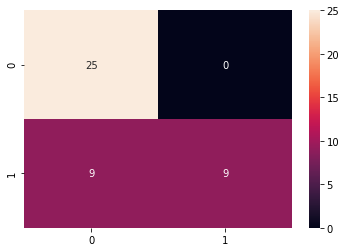

In [68]:
a = sns.heatmap(data=confusion_matrix(y_test,log_pred),annot = True)
bottom, top = a.get_ylim()
a.set_ylim(bottom + 0.5, top - 0.5)
plt.show();

In [69]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        25
           1       1.00      0.50      0.67        18

    accuracy                           0.79        43
   macro avg       0.87      0.75      0.76        43
weighted avg       0.85      0.79      0.77        43



#### Feature Selection

In [70]:
x = final[['No_Transactions',
       'No_Orders', 'No_Payments', 'Total_transaction_amt',
       'No_transactionsFail', 'PaymentRegFail', 'PaypalPayments',
       'ApplePayments', 'CardPayments', 'BitcoinPayments', 'OrdersFulfilled',
       'OrdersPending', 'OrdersFailed','Trns_fail_order_fulfilled','Duplicate_IP','Duplicate_Address','JCB_16', 'AmericanExp', 'VISA_16',
       'Discover', 'Voyager', 'VISA_13', 'Maestro', 'Mastercard', 'DC_CB',
       'JCB_15']]
y = final['Fraud_Decoded']

In [71]:
model = LogisticRegression()

In [72]:
rfe = RFE(model,n_features_to_select= 10)

In [73]:
rfe_fit = rfe.fit(x, y)

In [74]:
print('Num of Features: ', rfe_fit.n_features_)
print('Selected Features: ', rfe_fit.support_)
print('Feature Rank: ', rfe_fit.ranking_)

Num of Features:  10
Selected Features:  [ True  True  True False False False  True False False False  True  True
  True False  True  True False False False False False False  True False
 False False]
Feature Rank:  [ 1  1  1 16  5 15  1 17 12 13  1  1  1  3  1  1  8  2  7  9  6  4  1 11
 14 10]


In [75]:
x.columns

Index(['No_Transactions', 'No_Orders', 'No_Payments', 'Total_transaction_amt',
       'No_transactionsFail', 'PaymentRegFail', 'PaypalPayments',
       'ApplePayments', 'CardPayments', 'BitcoinPayments', 'OrdersFulfilled',
       'OrdersPending', 'OrdersFailed', 'Trns_fail_order_fulfilled',
       'Duplicate_IP', 'Duplicate_Address', 'JCB_16', 'AmericanExp', 'VISA_16',
       'Discover', 'Voyager', 'VISA_13', 'Maestro', 'Mastercard', 'DC_CB',
       'JCB_15'],
      dtype='object')

In [76]:
for i, j in enumerate(rfe_fit.ranking_):
    if(j == 1):
        print(x.columns[i])

No_Transactions
No_Orders
No_Payments
PaypalPayments
OrdersFulfilled
OrdersPending
OrdersFailed
Duplicate_IP
Duplicate_Address
Maestro


In [77]:
# Separate IV and DV

feature_cols = ['No_Transactions','No_Orders','No_Payments','PaypalPayments','OrdersFulfilled','OrdersPending',
'OrdersFailed','Duplicate_IP','Duplicate_Address','Maestro'] # only IVs

X = final[feature_cols]
Y = final['Fraud_Decoded']

# check the shape

print(X.shape)
print(Y.shape)
print('--'*50)

# Split the data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

# check the shape

X_train.shape; X_test.shape

# Import the model function, Invoke, Fit on the data

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)



# Generate predictions

predictions_train = logmodel.predict(X_train)
predictions_test = logmodel.predict(X_test)

logmodel.coef_

logmodel.intercept_

predictions_train

df_pred = pd.DataFrame(logmodel.predict_proba(X_train))

df_pred['FinalPred'] = predictions_train # based on: If >= 0.5 Then 1 Else 0 

df_pred.head(20)[[1,'FinalPred']]

df_pred['Pred_70%'] = np.where(logmodel.predict_proba(X_train)[:,1] > 0.7, 1, 0)

# numpy.where(Conditions, Result if True, Result if False)

df_pred.head(20)[[1,'FinalPred','Pred_70%']]



##### Metrics on Train data

# Check accuracy metrics 


print(classification_report(Y_train, predictions_train))
print(accuracy_score(Y_train, predictions_train))
print('--'*50)



(143, 10)
(143,)
----------------------------------------------------------------------------------------------------


(100, 10)

(43, 10)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

array([[-0.69074114,  0.72677039,  0.34957742, -0.73416904,  0.29165831,
         0.14154502,  0.33015557,  1.00399118,  0.99991489, -0.2926065 ]])

array([-1.66894178])

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

,1,FinalPred
0,0.940522,1
1,0.650024,1
2,0.333676,0
3,0.179292,0
4,0.088530,0
5,0.806733,1
6,0.435920,0
7,0.260922,0
8,0.380738,0
9,0.992994,1


,1,FinalPred,Pred_70%
0,0.940522,1,1
1,0.650024,1,0
2,0.333676,0,0
3,0.179292,0,0
4,0.088530,0,0
5,0.806733,1,1
6,0.435920,0,0
7,0.260922,0,0
8,0.380738,0,0
9,0.992994,1,1


              precision    recall  f1-score   support

           0       0.79      0.92      0.85        59
           1       0.84      0.66      0.74        41

    accuracy                           0.81       100
   macro avg       0.82      0.79      0.80       100
weighted avg       0.81      0.81      0.81       100

0.81
----------------------------------------------------------------------------------------------------


In [78]:
log_score_rfe = accuracy_score(Y_train, predictions_train)
log_score_rfe

0.81

### Decision Tree Classifier

In [79]:
# dividing into independent and dependent variables

x = final[['No_Transactions',
       'No_Orders', 'No_Payments', 'Total_transaction_amt',
       'No_transactionsFail', 'PaymentRegFail', 'PaypalPayments',
       'ApplePayments', 'CardPayments', 'BitcoinPayments', 'OrdersFulfilled',
       'OrdersPending', 'OrdersFailed','Trns_fail_order_fulfilled','Duplicate_IP','Duplicate_Address','JCB_16', 'AmericanExp', 'VISA_16',
       'Discover', 'Voyager', 'VISA_13', 'Maestro', 'Mastercard', 'DC_CB',
       'JCB_15']]
y = final['Fraud_Decoded']

In [80]:
# Splitting the data into training and testing set.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [81]:
DT_model = DecisionTreeClassifier()

In [82]:
DT_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [83]:
pred = DT_model.predict(x_train)

In [84]:
accuracy_score(y_train, pred)

1.0

In [85]:
pred_test = DT_model.predict(x_test)

In [86]:
accuracy_score(y_test, pred_test)

0.6976744186046512

In [87]:
DT_score_train = accuracy_score(y_train, pred)

In [88]:
DT_score_test = accuracy_score(y_test, pred_test)

In [89]:
DT_score_train
DT_score_test

1.0

0.6976744186046512

#### DTrees Feature Engineering

In [123]:
x = final[['No_Transactions',
       'No_Orders', 'No_Payments', 'Total_transaction_amt',
       'No_transactionsFail', 'PaymentRegFail', 'PaypalPayments',
       'ApplePayments', 'CardPayments', 'BitcoinPayments', 'OrdersFulfilled',
       'OrdersPending', 'OrdersFailed','Trns_fail_order_fulfilled','Duplicate_IP','Duplicate_Address','JCB_16', 'AmericanExp', 'VISA_16',
       'Discover', 'Voyager', 'VISA_13', 'Maestro', 'Mastercard', 'DC_CB',
       'JCB_15']]
y = final['Fraud_Decoded']

In [124]:
dtree_model = DecisionTreeClassifier()

rfe = RFE(dtree_model, 5)

fit = rfe.fit(x, y)

In [125]:
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)


5
[False False  True  True  True False False False  True False  True False
 False False False False False False False False False False False False
 False False]
[11 12  1  1  1 15 14 10  1 16  1 20 22  9  2  3  7 18  8  6  4  5 13 21
 17 19]


In [126]:
for i, j in enumerate(fit.ranking_):
    if(j == 1):
        print(x.columns[i])

No_Payments
Total_transaction_amt
No_transactionsFail
CardPayments
OrdersFulfilled


In [127]:
feature_cols = ['No_Payments','Total_transaction_amt','OrdersFulfilled','Duplicate_IP','Discover'] # only IVs

X = final[feature_cols]
Y = final['Fraud_Decoded']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

D_rfe_model = DecisionTreeClassifier()

D_rfe_model.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [128]:
dpredict_rfe = D_rfe_model.predict(X_test)

In [129]:
accuracy_score(Y_test,dpredict_rfe)

0.7209302325581395

In [130]:
DT_score_rfe = accuracy_score(Y_test,dpredict_rfe)

In [131]:
DT_score_rfe

0.7209302325581395

### Random Forest Classifier

In [167]:
x = final[['No_Transactions',
       'No_Orders', 'No_Payments', 'Total_transaction_amt',
       'No_transactionsFail', 'PaymentRegFail', 'PaypalPayments',
       'ApplePayments', 'CardPayments', 'BitcoinPayments', 'OrdersFulfilled',
       'OrdersPending', 'OrdersFailed','Trns_fail_order_fulfilled','Duplicate_IP','Duplicate_Address','JCB_16', 'AmericanExp', 'VISA_16',
       'Discover', 'Voyager', 'VISA_13', 'Maestro', 'Mastercard', 'DC_CB',
       'JCB_15']]
y = final['Fraud_Decoded']

In [168]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 101, test_size = 0.3)

In [169]:
rfc = RandomForestClassifier()

In [170]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [171]:
rfc_predict = rfc.predict(x_test)

In [172]:
rfc_score = accuracy_score(y_test, rfc_predict)

In [173]:
rfc_score

0.8372093023255814

#### Random Forest Classifier GridSearchCV

In [174]:
pram_grid = {'n_estimators' : [20,50,100],
            'criterion': ['gini', 'entropy'],
            'max_features':[10,12,15,20]}

In [175]:
mdl = RandomForestClassifier()

In [176]:
grid_results = GridSearchCV(mdl, pram_grid, cv = 6)

In [177]:
import time

In [178]:
import warnings
warnings.filterwarnings('ignore')

start = time.time()

grid_results.fit(x_train.values, y_train.values)

end = time.time()

print(end-start)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

5.778675556182861


In [179]:
grid_results.best_score_

0.79

In [180]:
grid_results.best_params_

{'criterion': 'gini', 'max_features': 10, 'n_estimators': 50}

In [183]:
rfc_score_grid = grid_results.best_score_
rfc_score_grid

0.79

### AdaBoostClassifier

In [245]:
x = final[['No_Transactions',
       'No_Orders', 'No_Payments', 'Total_transaction_amt',
       'No_transactionsFail', 'PaymentRegFail', 'PaypalPayments',
       'ApplePayments', 'CardPayments', 'BitcoinPayments', 'OrdersFulfilled',
       'OrdersPending', 'OrdersFailed','Trns_fail_order_fulfilled','Duplicate_IP','Duplicate_Address','JCB_16', 'AmericanExp', 'VISA_16',
       'Discover', 'Voyager', 'VISA_13', 'Maestro', 'Mastercard', 'DC_CB',
       'JCB_15']]
y = final['Fraud_Decoded']

In [246]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 11, test_size = 0.3)

In [247]:
abc = AdaBoostClassifier()

In [248]:
abc.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [249]:
abc_predict = abc.predict(x_test)

In [250]:
abc_score = accuracy_score(y_test,abc_predict)

In [251]:
abc_score

0.6744186046511628

### Support Vector Machine Classifier

In [220]:
x = final[['No_Transactions',
       'No_Orders', 'No_Payments', 'Total_transaction_amt',
       'No_transactionsFail', 'PaymentRegFail', 'PaypalPayments',
       'ApplePayments', 'CardPayments', 'BitcoinPayments', 'OrdersFulfilled',
       'OrdersPending', 'OrdersFailed','Trns_fail_order_fulfilled','Duplicate_IP','Duplicate_Address','JCB_16', 'AmericanExp', 'VISA_16',
       'Discover', 'Voyager', 'VISA_13', 'Maestro', 'Mastercard', 'DC_CB',
       'JCB_15']]
y = final['Fraud_Decoded']

In [221]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.3)

In [222]:
svc = SVC(kernel = 'linear')

In [223]:
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [224]:
svc_pred = svc.predict(x_test)

In [225]:
svc_score = accuracy_score(y_test,svc_pred)
svc_score

0.7209302325581395

#### SVC Gridsearchcv

In [226]:
from sklearn.model_selection import GridSearchCV

In [227]:
param_grid = {'C': [0.01,0.05,0.5,1], 'gamma': [0.1, 1,10,50], 'kernel': ['rbf', 'linear']}

In [228]:
gscv = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv = 3, verbose = 2)

In [229]:
start_time = time.time()

gscv.fit(x_train, y_train)

print(time.time() - start_time, 'Seconds')

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV] ................. C=0.01, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV] ................. C=0.01, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV] ................. C=0.01, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.05, gamma=1, kernel=linear ..................................
[CV] ................... C=0.05, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.05, gamma=1, kernel=linear ..................................
[CV] ................... C=0.05, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.05, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.05, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.05, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.05, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.05, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.05, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.05, gamma=10, kernel=linear .................................
[CV] .................. C=0.05, gamma=10, kernel=linear, total=   0.0s
[CV] C=0.05, gamma=10, kernel=linear .................................
[CV] .................. C=0.05, gamma=10, kernel=linear, total=   0.0s
[CV] 

[CV] ..................... C=1, gamma=50, kernel=linear, total=   0.1s


[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    1.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1], 'gamma': [0.1, 1, 10, 50],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

1.8538029193878174 Seconds


In [230]:
gscv.best_params_
gscv.best_score_

{'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}

0.8

In [257]:
svc_score_grid = gscv.best_score_ 

In [258]:
svc_score_grid

0.8

In [259]:
name = ['Logistic','Logistic_rfe','DTree','DTress_rfe','RandomForest','RandomForestGridSearch','AdaBoost','SVM','SVM_grid']
values = [log_score,log_score_rfe, DT_score_train, DT_score_rfe,rfc_score,rfc_score_grid,abc_score,svc_score,svc_score_grid]

## Accuracy Plot

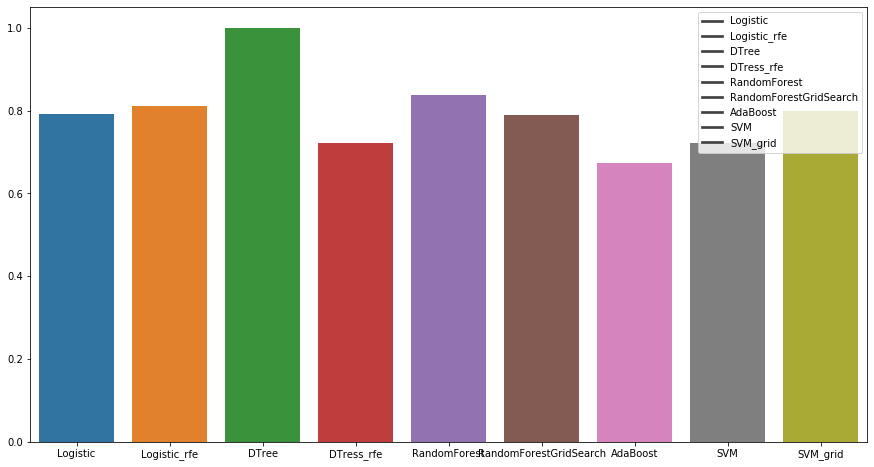

In [266]:
plt.figure(figsize = (15,8))
sns.barplot(name,values);
plt.legend(name, loc = 'best')
plt.show();

In [2]:
import tkinter

In [5]:
tk = tkinter.Tk()

In [6]:
tk.title("GUI")

''

In [8]:
label = tkinter.Label(tk, text = "Welcome to DataCamp's Tutorial on Tkinter!").pack()
tk.mainloop()

In [11]:
window = tkinter.Tk()
window.title("Button GUI")
button_widget = tkinter.Button(window,text="Welcome to DataCamp's Tutorial on Tkinter")
button_widget.pack()
tkinter.mainloop()

In [16]:
tk = tkinter.Tk()
tk.title("Button GUI")
button_widget = tkinter.Button(window,option= "Downloads/Accuracy_plot.png")
button_widget.pack()
tkinter.mainloop()

TclError: unknown option "-option"

In [21]:
import tkinter

# Let's create the Tkinter window.
window = tkinter.Tk()
window.title("GUI")

# You will first create a division with the help of Frame class and align them on TOP and BOTTOM with pack() method.
top_frame = tkinter.Frame(window).pack()
bottom_frame = tkinter.Frame(window).pack(side = "bottom")

# Once the frames are created then you are all set to add widgets in both the frames.
btn1 = tkinter.Button(top_frame, text = "Button1", fg = "red").pack() #'fg or foreground' is for coloring the contents (buttons)

btn2 = tkinter.Button(top_frame, text = "Button2", fg = "green").pack()

btn3 = tkinter.Button(bottom_frame, text = "Button3", fg = "purple").pack(side = "left") #'side' is used to left or right align the widgets

btn4 = tkinter.Button(bottom_frame, text = "Button4", fg = "orange").pack(side = "left")

window.mainloop()

In [50]:
window = tkinter.Tk()



photo = tkinter.PhotoImage(file = r"C:\Users\CR GAYATHRI\Desktop\Python_Internship\Fraud_Detect\Accuracy_plot.PNG") 

tkinter.Button(window, text = 'Click Me !', image = photo).pack(side = "top")

window.mainloop()